In [1]:
#Edgar Moises Hernandez-Gonzalez
#08/07/19-16/12/19
#Clasificar habla imaginada en EEG con CNN-1D + LSTM
#Esta es la arquitectura final

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import TimeDistributed, Conv1D, MaxPool1D, Dropout, Flatten, LSTM, Dense
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
datos = pd.read_csv("Submuestreo01.csv", header=None)
x = datos.iloc[:, 0:3072]
y = datos.iloc[:, 3072]

In [3]:
print(x.shape)
print(y.shape)

(132, 3072)
(132,)


In [4]:
n_samples = len(y)
print("n_samples:", n_samples)

n_samples: 132


In [5]:
n_classes = len(np.unique(y))
print("n_classes:", n_classes)

n_classes: 6


In [6]:
#escalar los datos para que tengan media = 0 y desviacion estandar = 1
x = StandardScaler().fit_transform(x)

In [7]:
#convertir de 2D a 4D
x = x.reshape((n_samples, 1, 6, 512))
print(x.shape)

(132, 1, 6, 512)


In [8]:
x = np.transpose(x, (0,1,3,2))

print(x.shape)

(132, 1, 512, 6)


In [9]:
#dividir en train y test
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [10]:
model = Sequential()
model.add(TimeDistributed(Conv1D(64, 3, activation='relu'), input_shape=(None,512,6)))
model.add(TimeDistributed(Conv1D(64, 3, activation='relu')))
model.add(TimeDistributed(Dropout(0.5)))
model.add(TimeDistributed(MaxPool1D(2)))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(100))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed (TimeDistri (None, None, 510, 64)     1216      
_________________________________________________________________
time_distributed_1 (TimeDist (None, None, 508, 64)     12352     
_________________________________________________________________
time_distributed_2 (TimeDist (None, None, 508, 64)     0         
_________________________________________________________________
time_distributed_3 (TimeDist (None, None, 254, 64)     0         
_________________________________________________________________
time_distributed_4 (TimeDist (None, None, 16256)       0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               6542800   
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
__________

In [13]:
history = model.fit(x_train, y_train, epochs = 20, batch_size = 64, validation_data=(x_test, y_test))

Train on 99 samples, validate on 33 samples
Epoch 1/20
99/99 [==============================] - 3s 28ms/sample - loss: 1.7830 - acc: 0.2121 - val_loss: 1.8139 - val_acc: 0.1818
Epoch 2/20
99/99 [==============================] - 0s 1ms/sample - loss: 1.7617 - acc: 0.2626 - val_loss: 1.7813 - val_acc: 0.1212
Epoch 3/20
99/99 [==============================] - 0s 1ms/sample - loss: 1.6908 - acc: 0.3434 - val_loss: 1.7859 - val_acc: 0.1212
Epoch 4/20
99/99 [==============================] - 0s 1ms/sample - loss: 1.6220 - acc: 0.3636 - val_loss: 1.8434 - val_acc: 0.1212
Epoch 5/20
99/99 [==============================] - 0s 1ms/sample - loss: 1.5442 - acc: 0.3737 - val_loss: 1.8421 - val_acc: 0.0909
Epoch 6/20
99/99 [==============================] - 0s 1ms/sample - loss: 1.4666 - acc: 0.5354 - val_loss: 1.8513 - val_acc: 0.0909
Epoch 7/20
99/99 [==============================] - 0s 1ms/sample - loss: 1.3437 - acc: 0.5960 - val_loss: 1.8210 - val_acc: 0.1515
Epoch 8/20
99/99 [=============

In [14]:
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

33/33 [==============================] - 0s 848us/sample - loss: 2.2634 - acc: 0.2424
Test loss: 2.263412468361132
Test accuracy: 0.24242425


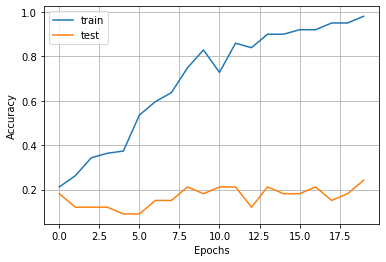

In [15]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'])
plt.show()

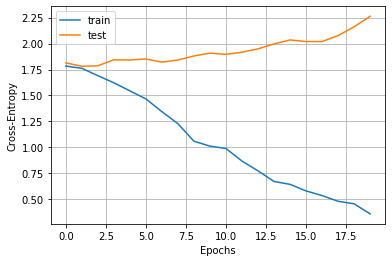

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend(['train', 'test'])
plt.show()

In [17]:
probabilidades = model.predict(x_test)
y_pred = np.argmax(probabilidades, 1) #1=fila

In [18]:
matrizConfusion = confusion_matrix(y_test, y_pred)
print(matrizConfusion)

[[2 0 0 1 2 0]
 [0 2 4 0 0 0]
 [0 2 3 0 0 0]
 [0 1 1 0 0 1]
 [1 4 2 0 1 0]
 [0 3 2 1 0 0]]


In [19]:
reporteClassificacion = classification_report(y_test, y_pred)
print(reporteClassificacion)

              precision    recall  f1-score   support

           0       0.67      0.40      0.50         5
           1       0.17      0.33      0.22         6
           2       0.25      0.60      0.35         5
           3       0.00      0.00      0.00         3
           4       0.33      0.12      0.18         8
           5       0.00      0.00      0.00         6

   micro avg       0.24      0.24      0.24        33
   macro avg       0.24      0.24      0.21        33
weighted avg       0.25      0.24      0.21        33

